In [28]:
#imports
import pandas as pd
import os
from dotenv import load_dotenv
from sklearn.preprocessing import LabelEncoder

# Load environment variables
load_dotenv()

# Read CSV file
df = pd.read_csv(os.environ['TRAIN_LOCATION'])

#rename columns
df.rename(columns={'Working Professional or Student': 'Working Student', 'Have you ever had suicidal thoughts ?': 'Suicidal Thoughts', 'Family History of Mental Illness':'Family Mental Illness' }, inplace=True)

# Convert all column names to snake_case
df.columns = (
    df.columns
    .str.strip()                              # remove leading/trailing spaces
    .str.replace(' ', '_')                    # replace spaces with underscores
    .str.replace('[^A-Za-z0-9_]+', '', regex=True)  # remove special characters
    .str.lower()            
                      # convert to lowercase (optional)
)

# View result
df.head()

,id,name,gender,age,city,working_student,profession,academic_pressure,work_pressure,cgpa,study_satisfaction,job_satisfaction,sleep_duration,dietary_habits,degree,suicidal_thoughts,workstudy_hours,financial_stress,family_mental_illness,depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


In [29]:
#Check for missing and duplicates
print(df.duplicated().sum()) # no duplicates
df.isna().sum() #We have alot of missing data that we will deal with in different ways

0


id                            0
name                          0
gender                        0
age                           0
city                          0
working_student               0
profession                36630
academic_pressure        112803
work_pressure             27918
cgpa                     112802
study_satisfaction       112803
job_satisfaction          27910
sleep_duration                0
dietary_habits                4
degree                        2
suicidal_thoughts             0
workstudy_hours               0
financial_stress              4
family_mental_illness         0
depression                    0
dtype: int64

In [30]:
# Preprocessing
# Convert Yes/No columns to binary (1/0)
df = df.map(lambda x: 1 if x == 'Yes' else 0 if x == 'No' else x)
# Make working_student binary: 1 if working, 0 if student
df['working_student'] = df['working_student'].map({'Working Professional': 1, 'Student': 0})
# Convert gender to binary: Male = 1, Female = 0
df['gender'] = df['gender'].map({'Male': 1, 'Female': 0})
# remove sleep_duration occurences that have less than 10 appearences
df = df[df['sleep_duration'].isin(df['sleep_duration'].value_counts()[df['sleep_duration'].value_counts() >= 10].index)]
# remove dietary_habits occurences that have less than 10 appearences
df = df[df['dietary_habits'].isin(df['dietary_habits'].value_counts()[df['dietary_habits'].value_counts() >= 10].index)]
# Set dietary_habits Unhealthy(0) Moderate(1) Healthy (2)
df["dietary_habits"] = df["dietary_habits"].map({
    "Unhealthy": 0,
    "Moderate": 1,
    "Healthy": 2
})
#if profession is student then make profession "Student"
df.loc[df["working_student"] == 0, "profession"] = "Student"
#If profession is still NaN, set to "Unemployed"
df.loc[df["profession"].isna(), "profession"] = "Unemployed"
#Map sleeping hours to numbers
df['sleep_duration'] = LabelEncoder().fit_transform(df['sleep_duration'])
df['degree'] = LabelEncoder().fit_transform(df['degree'])
df['profession'] = LabelEncoder().fit_transform(df['degree'])

#print 
display(df.isna().sum())
display(df.sample(5))

id                            0
name                          0
gender                        0
age                           0
city                          0
working_student               0
profession                    0
academic_pressure        112737
work_pressure             27890
cgpa                     112736
study_satisfaction       112737
job_satisfaction          27882
sleep_duration                0
dietary_habits                0
degree                        0
suicidal_thoughts             0
workstudy_hours               0
financial_stress              4
family_mental_illness         0
depression                    0
dtype: int64

,id,name,gender,age,city,working_student,profession,academic_pressure,work_pressure,cgpa,study_satisfaction,job_satisfaction,sleep_duration,dietary_habits,degree,suicidal_thoughts,workstudy_hours,financial_stress,family_mental_illness,depression
90064,90064,Vidhi,0,38.0,Ahmedabad,1,29,NaN,2.0,NaN,NaN,1.0,4,2,29,1,7.0,2.0,1,0
80571,80571,Ishaani,0,41.0,Ahmedabad,1,20,NaN,5.0,NaN,NaN,1.0,1,2,20,0,7.0,2.0,1,0
137618,137618,Aditi,0,43.0,Ahmedabad,1,79,NaN,4.0,NaN,NaN,1.0,1,0,79,0,7.0,2.0,1,0
21098,21098,Reyansh,1,38.0,Nagpur,1,84,NaN,2.0,NaN,NaN,5.0,1,0,84,1,4.0,1.0,1,0
136871,136871,Vibha,0,46.0,Chennai,1,80,NaN,4.0,NaN,NaN,3.0,2,2,80,1,9.0,2.0,0,0


In [31]:
#Now we want to split it into 2 datasets, students and workers
students_df = df.loc[df["working_student"] == 0].drop({"working_student", "work_pressure", "job_satisfaction"}, axis=1)
working_df = df.loc[df["working_student"] == 1].drop({"working_student", "study_satisfaction", "cgpa", "academic_pressure"}, axis=1)

display(students_df)

,id,name,gender,age,city,profession,academic_pressure,cgpa,study_satisfaction,sleep_duration,dietary_habits,degree,suicidal_thoughts,workstudy_hours,financial_stress,family_mental_illness,depression
2,2,Yuvraj,1,33.0,Visakhapatnam,21,5.0,8.97,2.0,1,2,21,1,3.0,1.0,0,1
8,8,Aishwarya,0,24.0,Bangalore,36,2.0,5.90,5.0,1,1,36,0,3.0,2.0,1,0
26,26,Aditya,1,31.0,Srinagar,25,3.0,7.03,5.0,3,2,25,0,9.0,1.0,1,0
30,30,Prisha,0,28.0,Varanasi,29,3.0,5.59,2.0,2,1,29,1,4.0,5.0,1,1
32,32,Chhavi,0,25.0,Jaipur,78,4.0,8.13,3.0,1,1,78,1,1.0,1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140685,140685,Aaradhya,0,27.0,Surat,45,5.0,5.75,5.0,1,0,45,1,7.0,1.0,1,0
140686,140686,Rohan,1,27.0,Ludhiana,89,2.0,9.40,3.0,3,2,89,0,0.0,3.0,1,0
140689,140689,Ayaan,1,31.0,Faridabad,83,3.0,6.61,4.0,1,0,83,0,12.0,2.0,0,0
140690,140690,Rashi,0,18.0,Ludhiana,45,5.0,6.88,2.0,3,2,45,1,10.0,5.0,0,1


In [32]:
#scale our data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

student_numeric_cols = students_df.select_dtypes(include=["number"]).columns.drop({'id', 'gender', 'suicidal_thoughts', 'family_mental_illness', 'depression'})
students_df[student_numeric_cols] = scaler.fit_transform(students_df[student_numeric_cols])

working_numeric_cols = working_df.select_dtypes(include=["number"]).columns.drop({'id', 'gender', 'suicidal_thoughts', 'family_mental_illness', 'depression'})
working_df[working_numeric_cols] = scaler.fit_transform(working_df[working_numeric_cols])

display(students_df)
display(working_df)

,id,name,gender,age,city,profession,academic_pressure,cgpa,study_satisfaction,sleep_duration,dietary_habits,degree,suicidal_thoughts,workstudy_hours,financial_stress,family_mental_illness,depression
2,2,Yuvraj,1,1.463387,Visakhapatnam,-1.088531,1.345625,0.895455,-0.694404,-1.421856,1.374590,-1.088531,1,-1.121781,-1.48901,0,1
8,8,Aishwarya,0,-0.371209,Bangalore,-0.492558,-0.827297,-1.200940,1.511271,-1.421856,0.119835,-0.492558,0,-1.121781,-0.79326,1,0
26,26,Aditya,1,1.055699,Srinagar,-0.929605,-0.102990,-0.429303,1.511271,0.461765,1.374590,-0.929605,0,0.496712,-1.48901,1,0
30,30,Prisha,0,0.444167,Varanasi,-0.770679,-0.102990,-1.412628,-0.694404,-0.480045,0.119835,-0.770679,1,-0.852032,1.29399,1,1
32,32,Chhavi,0,-0.167365,Jaipur,1.176166,0.621317,0.321848,0.040821,-1.421856,0.119835,1.176166,1,-1.661279,-1.48901,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140685,140685,Aaradhya,0,0.240323,Surat,-0.134974,1.345625,-1.303370,1.511271,-1.421856,-1.134920,-0.134974,1,-0.042785,-1.48901,1,0
140686,140686,Rohan,1,0.240323,Ludhiana,1.613213,-0.827297,1.189086,0.040821,0.461765,1.374590,1.613213,0,-1.931028,-0.09751,1,0
140689,140689,Ayaan,1,1.055699,Faridabad,1.374823,-0.102990,-0.716106,0.776046,-1.421856,-1.134920,1.374823,0,1.305959,-0.79326,0,0
140690,140690,Rashi,0,-1.594274,Ludhiana,-0.134974,1.345625,-0.531733,-0.694404,0.461765,1.374590,-0.134974,1,0.766461,1.29399,0,1


,id,name,gender,age,city,profession,work_pressure,job_satisfaction,sleep_duration,dietary_habits,degree,suicidal_thoughts,workstudy_hours,financial_stress,family_mental_illness,depression
0,0,Aaradhya,0,0.457458,Ludhiana,-0.626486,1.423374,-0.688174,1.366330,1.229964,-0.626486,0,-1.303934,-0.677175,0,0
1,1,Vivan,1,-1.643013,Varanasi,0.465831,0.712037,0.017967,0.447387,-1.256096,0.465831,1,0.251907,0.034454,0,1
3,3,Yuvraj,1,-2.008313,Mumbai,-0.808538,1.423374,-1.394315,0.447387,-0.013066,-0.808538,1,1.029828,-1.388803,1,1
4,4,Rhea,0,-1.277714,Kanpur,-0.808538,-1.421973,-1.394315,-1.390499,-1.256096,-0.808538,1,0.770521,0.746083,1,0
5,5,Vani,0,1.370706,Ahmedabad,1.157631,-0.710636,1.430250,-1.390499,1.229964,1.157631,0,0.251907,1.457711,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140694,140694,Ishaani,0,0.092158,Ahmedabad,-1.099823,-0.710636,1.430250,0.447387,-0.013066,-1.099823,1,-1.303934,1.457711,0,0
140695,140695,Vidya,0,-2.373612,Ahmedabad,-0.189559,1.423374,0.724108,-1.390499,-1.256096,-0.189559,0,-1.044627,0.746083,1,1
140696,140696,Lata,0,-0.273141,Hyderabad,-0.954181,1.423374,0.724108,-0.471556,-0.013066,-0.954181,1,-0.007400,1.457711,1,0
140697,140697,Aanchal,0,-1.825663,Kolkata,-1.136233,0.000701,-1.394315,1.366330,-0.013066,-1.136233,0,-0.526013,0.746083,0,0


In [33]:
# from OurModels import LinearRegressionModel
# model = LinearRegressionModel()
# modelResults = model.train(students_df)
# model.output(*modelResults)  # unpack y_pred, y_test
# model.charts(*modelResults)

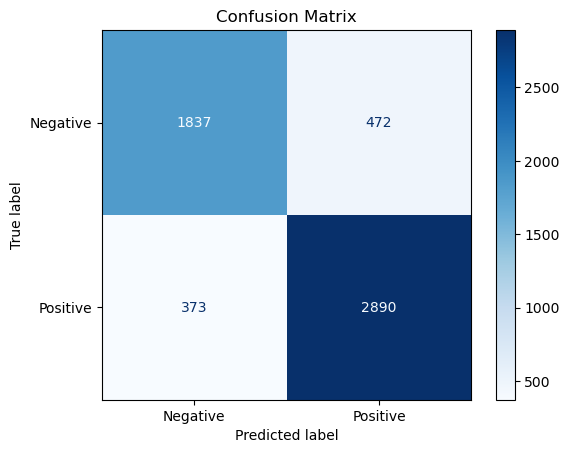

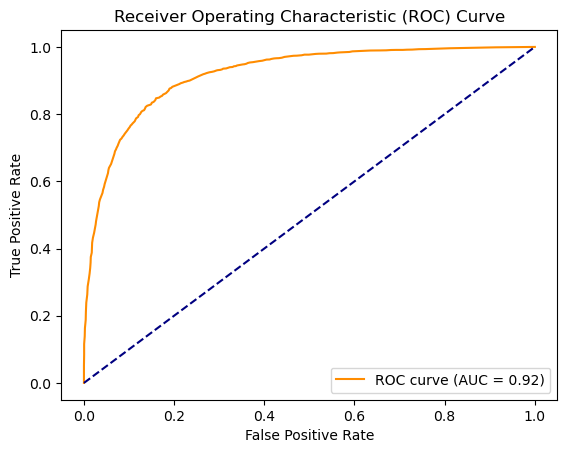


📊 SVC Model Performance
----------------------------------------
Accuracy : 0.8483
Precision: 0.8478
Recall   : 0.8483
F1 Score : 0.8478
----------------------------------------
OOB score: 0.8370
Top feature importances:
                  feature  importance
0       suicidal_thoughts    0.213510
1       academic_pressure    0.166752
2        financial_stress    0.097109
3                    cgpa    0.095508
4                     age    0.088485
5         workstudy_hours    0.075975
6                  degree    0.052600
7              profession    0.052271
8      study_satisfaction    0.046776
9          dietary_habits    0.038166
10         sleep_duration    0.037759
11                 gender    0.017656
12  family_mental_illness    0.017434


In [34]:
from OurModels import RandomForestRegressorModel
model = RandomForestRegressorModel()
studentModelResults = model.train(students_df)
model.charts(*studentModelResults)
model.output(*studentModelResults)

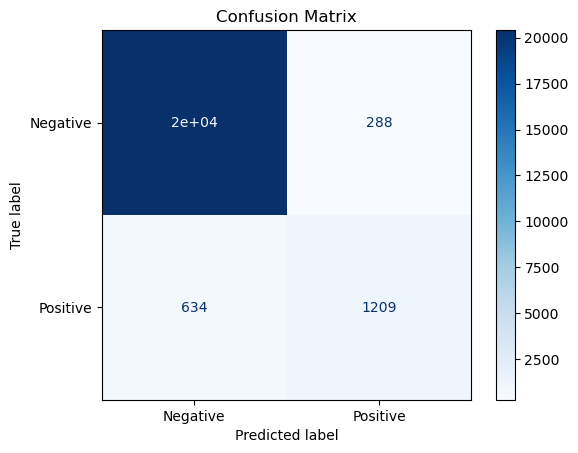

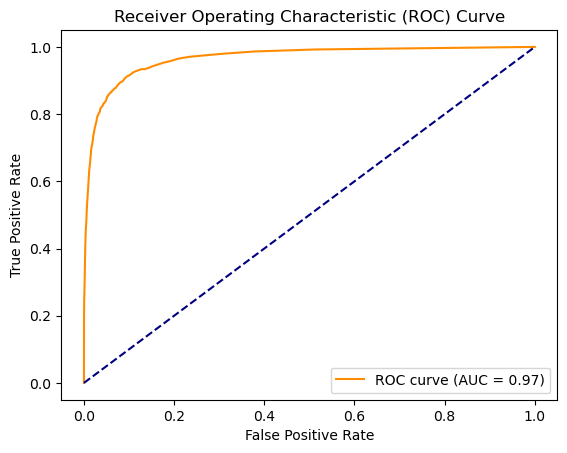


📊 SVC Model Performance
----------------------------------------
Accuracy : 0.9591
Precision: 0.9566
Recall   : 0.9591
F1 Score : 0.9571
----------------------------------------
OOB score: 0.9587
Top feature importances:
                  feature  importance
0                     age    0.382240
1       suicidal_thoughts    0.085490
2         workstudy_hours    0.082052
3           work_pressure    0.078402
4        financial_stress    0.069779
5        job_satisfaction    0.067770
6                  degree    0.059656
7              profession    0.058209
8          sleep_duration    0.041588
9          dietary_habits    0.034726
10  family_mental_illness    0.020140
11                 gender    0.019948


In [35]:
workingModelResults = model.train(working_df)
model.charts(*workingModelResults)
model.output(*workingModelResults)

In [36]:
student = (students_df['depression'] == 1).sum()
working = (working_df['depression'] == 1).sum()
total = (df['depression'] == 1).sum()

print(round(student/total * 100),"%")
print(round(working/total * 100), "%")

64 %
36 %
